<p align="center">
  <img src="img/house.jpg" width="1000" title="img-principal">
</p>

# CONTEXTO DO PROBLEMA

A House Rocket é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia.
Você é um Data Scientist contrato pela empresa para ajudar a encontrar as melhores oportunidades de negócio no mercado de imóveis. O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.
Sua principal estratégia é comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos. Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita.
Entretanto, as casas possuem muitos atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços. 


Portanto, seu trabalho como Data Scientist é responder as seguinte perguntas:

1. Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?

2. Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?

# ENTENDIMENTO DO PROBLEMA

**Motivação:**

- Encontrar as melhores oportunidades no mercado de imóveis.

**Causa Raiz do Problema:**

- Maximizar a receita da empresa encontrando boas oportunidades de negócio.

**Formato da Solução:**

- **Tipo de Problema**: Análise.
- **Métodos**: Análise de dados/Insight/EDA
- **Formato da Entrega**: Relatório Excel com as sugestões de compra dos imóveis, valor de compra, hora da venda sugerida e o valor vendido recomendado.

# 0.0 IMPORTS

In [1]:
# Math and manipulation
import pandas as pd
import numpy as np
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 0.1 Funções Auxiliares

In [2]:
# correlation categories
def cramer_v(x, y):
    
    cm = pd.crosstab(x, y).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = stats.chi2_contingency(cm)[0]
    chi2_corr = max(0, chi2 - (k-1) * (r-1) / (n-1))
    
    kcorr = k - (k-1) **2 / (n-1)
    rcorr = r - (r-1) **2 / (n-1)
    
    return np.sqrt((chi2_corr / n) / (min(kcorr-1, rcorr-1)))


# Show matrix correlation
def show_matrix(col, data, output='list'):

    rows = []
    index = []
    columns = []

    for c in data.columns:

        result = cramer_v(x=data[str(col)], y=data[str(c)])

        rows.append(result)
        index.append(str(c))
        columns.append(str(col))
        
    if output == 'list':
        return rows
    
    elif output == 'dict':
        return pd.DataFrame(rows, index=index, columns=[str(col)])

## 0.2 Carregamento de Dados

In [3]:
df = pd.read_csv('data/kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 1.0 DESCRIÇÃO DE DADOS

## 1.1 Dimensão de Dados

In [4]:
col = df.shape[1]
row = df.shape[0]

print(f'Columns: {col}')
print(f'Row: {row}')

Columns: 21
Row: 21613


## 1.2 Tipo de Dados

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 1.3 Verificação de Dados Faltantes

In [6]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.4 Mudança de Tipo nos Dados

In [7]:
# waterfront
df['waterfront'] = df['waterfront'].astype(str)

# condition
df['condition'] = df['condition'].astype(str)

# date
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x[:8][:4] + '-' + x[:8][4:6] + '-' + x[:8][6:]))

# id
df['id'] = df['id'].astype('str')

## 1.5 Remoção de inconsistencias

In [8]:
# bathrooms
df['bathrooms'] = df['bathrooms'].apply(lambda x: str(x)[0]).astype('int')

# floors
df['floors'] = df['floors'].apply(lambda x: str(x)[0]).astype('int')

## 1.6 Estatistica Descritiva

### 1.6.1 Atributos Numéricos

In [9]:
numerical = df.select_dtypes(include=['int64', 'float64']).drop(columns=['zipcode'])

describe = numerical.describe().T

describe['skew'] = numerical.apply(lambda x: x.skew()) # add skel
describe['kurtosis'] = numerical.apply(lambda x: x.kurtosis()) # add kurtosis

describe

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06,4.024069,34.585540
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01,1.974300,49.063653
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04,1.471555,5.243093
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06,13.060019,285.077820
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00,3.395750,10.893022
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01,0.771103,1.190932
sqft_above,21613.0,1788.390691,828.090978,290.0000,1190.000,1560.0000,2210.000,9.410000e+03,1.446664,3.402304
sqft_basement,21613.0,291.509045,442.575043,0.0000,0.000,0.0000,560.000,4.820000e+03,1.577965,2.715574
yr_built,21613.0,1971.005136,29.373411,1900.0000,1951.000,1975.0000,1997.000,2.015000e+03,-0.469805,-0.657408
yr_renovated,21613.0,84.402258,401.679240,0.0000,0.000,0.0000,0.000,2.015000e+03,4.549493,18.701152


**Inisght:**

<ins>Distribuição dos dados</ins>: O preço das casas possuem grande range de valores e variam em cerca de 367k por casa. No geral, os dados estão concentrados em torno da média e possuem uma skew positiva fazendo os dados se deslocarem para a esquerda. 

<ins>Negócio</ins>: 50% das casas tem o preço de 450K e possuem uma média de 3 quartos, 2 baheiros, construídas em 1971 e com uma nota média de 7,5.

### 1.6.2 Atributos Categóricos

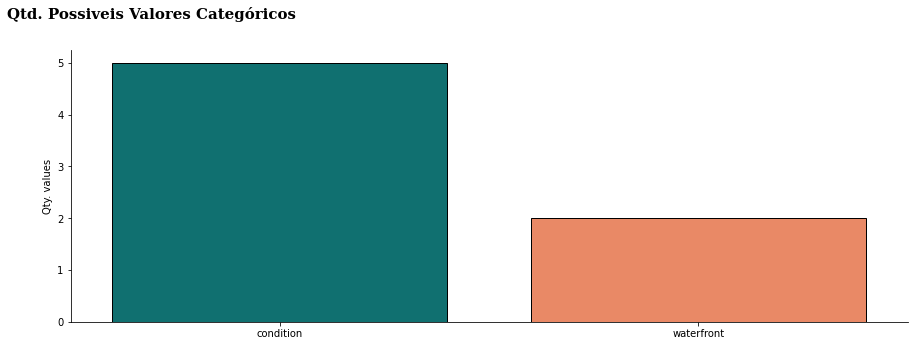

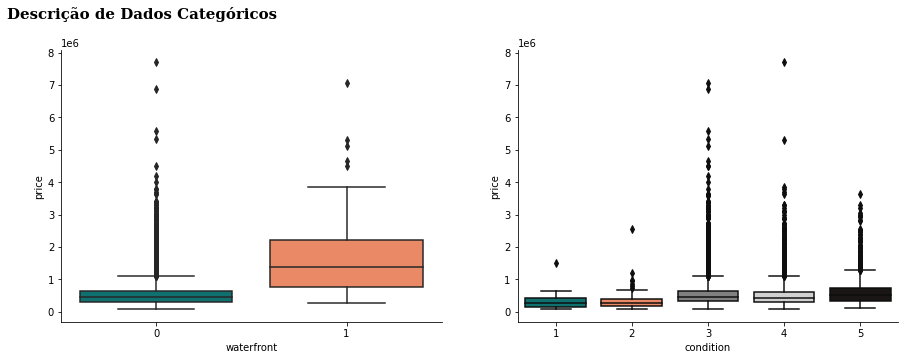

In [10]:
# Figure 1
plt.figure(figsize=(15, 5))
n_values = df[['condition', 'waterfront']].apply(lambda x: len(x.unique())).sort_values(ascending=False)
sns.barplot(x=n_values.index, y=n_values.values, palette=['teal', 'coral', 'gray'], ec='k')
sns.despine(right=True)
plt.ylabel('Qty. values')
plt.suptitle('Qtd. Possiveis Valores Categóricos', x=0.2, y=1., size=15,
             fontweight='bold', color='black', fontname='serif')

# Figure 2
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='waterfront', y='price', data=df, palette=['teal', 'coral'])
sns.despine(right=True)
plt.suptitle('Descrição de Dados Categóricos', x=0.2, y=1., size=15, fontweight='bold', color='black', fontname='serif')

# Figure 3
plt.subplot(1, 2, 2)
sns.boxplot(x='condition', y='price', data=df, order=['1', '2', '3', '4', '5'], 
            palette=['teal', 'coral', 'gray', '#d1d1d1', '#1a1616'])
sns.despine(right=True)

**Inisght:**

As variaveis categóricas possuem um range entre 2 e 5 dos possíveis valores. Casas sem vista para o mar possuem preços mais concentrados e com maior quantidade de valores extremos, já casas com vista para o mar obtem mais dispensão nos preços.

As condições das casas mostram distribuições parecidas para todas as categorias, mas casas com condição 5 possuem maior mediana de preço. E, também, condições de casas sendo 3 e 4 possuem maior mediana comparado as condições 1 e 2. Além disso, condições 3, 4 e 5 possuem maior quantidade de preços extremos.

# 2.0 FEATURE ENGINEERING

## 2.1 Mapa Mental de Hipóteses

<p align="center">
  <img src="img/mapa_mental.png" width="1000" title="img-principal">
</p>

## 2.2 Lista de Hipóteses

### 2.2.1 Hipóteses Comodidades

**1.** Imóveis com 3 quartos são mais caros do que imóveis com 2, na média.

**2.** Imóveis sem porão são maiores do que com porão.

**3.** Imóveis com porão são mais caros, na média.

**4.** Imóveis são mais caros ao longo do tempo, na média.

### 2.2.2 Hipóteses Conservação

**1.** A maior parte dos imóveis de alto padrão possuem reformas.

**2.** Imóveis com condição igual a 1 são 30% mais baratos, na média.

**3.** Imóveis com data de construção menor que 1955, são 50% mais baratos, na média. 

**4** Imóveis com notas iguais a 1 são mais baratos, na média.

**5.** Em média, imóveis sem reforma são mais baratos.

### 2.2.3 Hipóteses Localização

**1.** Imóveis que possuem vista para água, são mais caros, na média.

**2.** Imóveis disponíveis para venda no inverno são mais baratos.

**3.** Imóveis que são considerados casas são mais caros do que apartamentos, na média.

## 2.3 Feature Engineering

In [11]:
# basement
df['basement'] = df['sqft_basement'].apply(
    lambda x: 'No' if x == 0 else 'Yes'
)

# yr_built_category
df['yr_built_category'] = df['yr_built'].apply(
    lambda x: '>= 2000' if x >= 2000 else '< 2000'
)

# renovated
df['renovated'] = df['yr_renovated'].apply(
    lambda x: 'no' if x == 0 else 'yes'
)

# Category house
df['category'] = df['bedrooms'].apply(
    lambda x: 'commercial' if x == 0 else 'studio' 
                           if x == 1 else 'apartment' 
                           if x == 2 else 'house'
)

# Time built
df['time_built'] = df[['yr_built', 'date']].apply(
    lambda x: int(str(x['date'])[:4]) - x['yr_built'], axis=1
)

# standard_type
df['standard_type'] = df['price'].apply(
    lambda x: 'high_standard' if x > 540000 else 'low_standard'
)

# season
df['season'] = df['date'].apply(
    lambda x: 'summer' if str(x)[5:7] in ['06', '07', '08'] else 'fall' 
                       if str(x)[5:7] in ['09', '10', '11'] else 'winter'
                       if str(x)[5:7] in ['12', '01', '02'] else 'spring'
)

# 3.0 ANÁLISE EXPLORATÓRIA

## 3.1 Análise Univariada

### 3.1.1 Variável preço

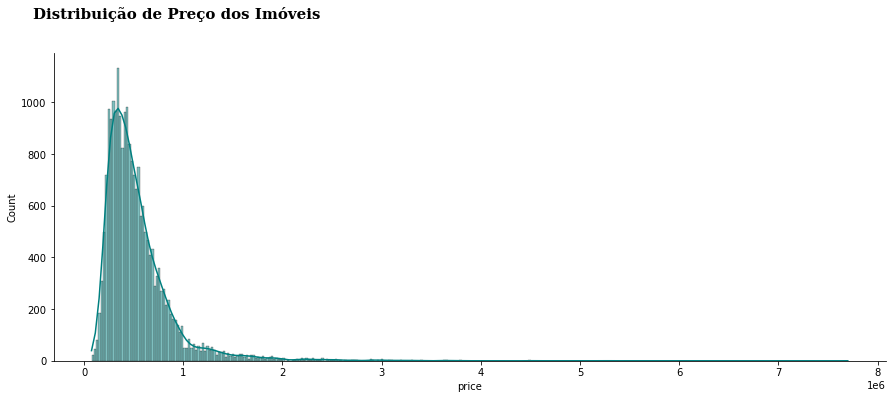

In [12]:
# Dsitribuition price variable
sns.displot(df['price'], aspect=2.5, kde=True, color='teal')
plt.suptitle('Distribuição de Preço dos Imóveis', x=0.2, y=1.1, size=15, fontweight='bold', color='black', fontname='serif');

**Insight:**

O preço das casas possuem uma distribuição positiva levando a concentração dos dados para a esquerda. Isso mostra que, na maioria das casas, os preços são de valores mais baixos e há menor probabilidade de ter preços com valores extremos.

### 3.1.2 Variável Numérica

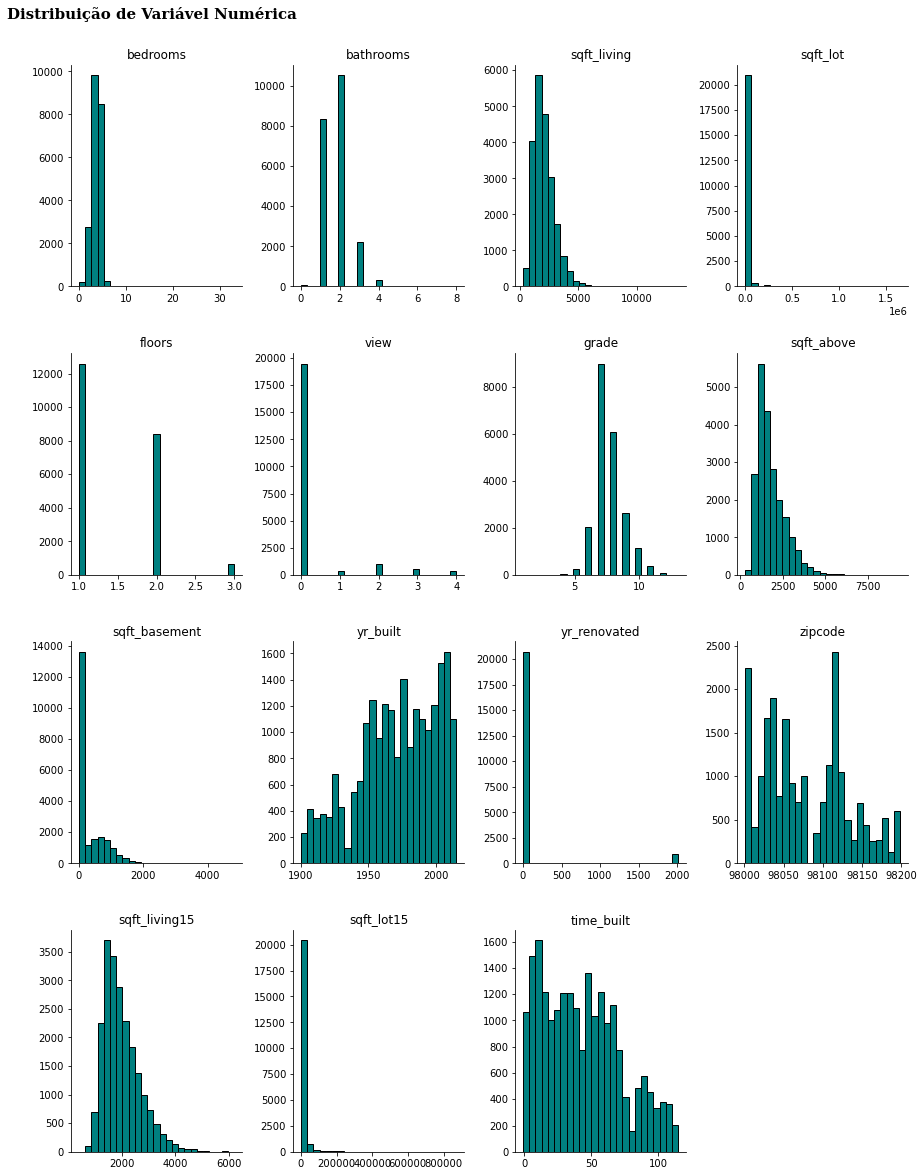

In [13]:
# Filter numerical variables
df.drop(columns=['lat', 'long', 'date', 'price', 'id']).hist(
    figsize=(15, 20), bins=25, ec='k', grid=False, color='teal'
)

sns.despine(right=True)
plt.suptitle('Distribuição de Variável Numérica', x=0.2, y=0.92, size=15,
             fontweight='bold', color='black', fontname='serif');

**Insight:**

As variaveis Bedrooms, bathrooms e grade estão mais distribuidos estando próximos da distribuição Gaussiana tendo a maior parte dos dados concentrados bem perto da média. A metragem dos imóveis possuem uma distribuição com dados concentrados a esquerda, mostrando que a maior parte das metragens estão em valores menores. O mesmo acontece para o tamanho do porão.

### 3.1.3 Variável Categórica

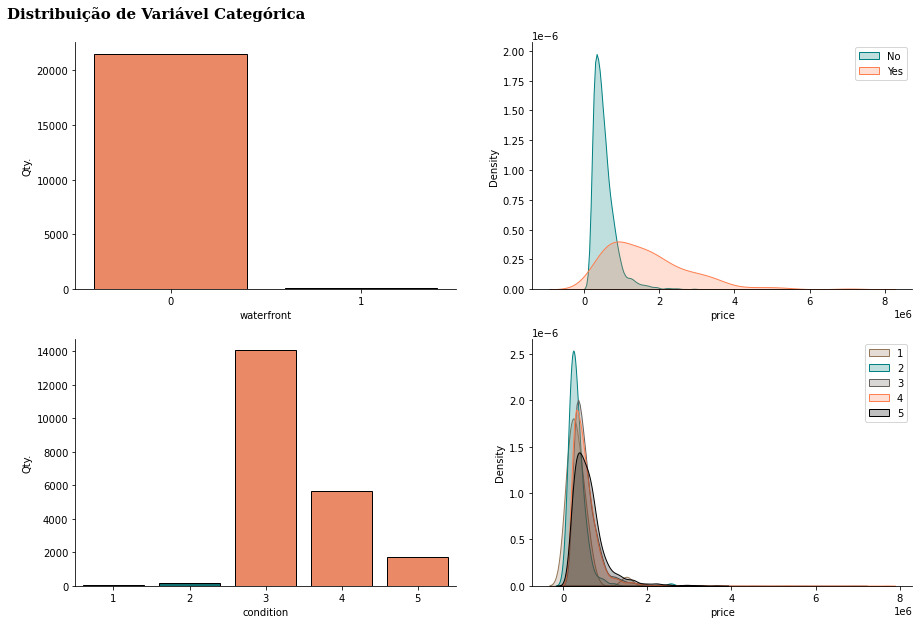

In [14]:
# Figure 1
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='waterfront', data=df, palette=['coral', 'teal'], ec='k')
sns.despine(right=True)
plt.ylabel('Qty.')

# Figure 2
plt.subplot(2, 2, 2)
sns.kdeplot(x=df[df['waterfront'] == '0']['price'], label='No', shade=True, color='teal')
sns.kdeplot(x=df[df['waterfront'] == '1']['price'], label='Yes', shade=True, color='coral')
plt.legend()
sns.despine(right=True)

# Figure 3
plt.subplot(2, 2, 3)
sns.countplot(x='condition', data=df, order=['1', '2', '3', '4', '5'],
              palette=['teal', 'teal', 'coral', 'coral', 'coral'], ec='k')
sns.despine(right=True)
plt.ylabel('Qty.')

# Figure 4
plt.subplot(2, 2, 4)
sns.kdeplot(x=df[df['condition'] == '1']['price'], label='1', shade=True, color='#947759')
sns.kdeplot(x=df[df['condition'] == '2']['price'], label='2', shade=True, color='teal')
sns.kdeplot(x=df[df['condition'] == '3']['price'], label='3', shade=True, color='#66615d')
sns.kdeplot(x=df[df['condition'] == '4']['price'], label='4', shade=True, color='coral')
sns.kdeplot(x=df[df['condition'] == '5']['price'], label='5', shade=True, color='black')
plt.legend()
sns.despine(right=True)
plt.suptitle('Distribuição de Variável Categórica', x=0.2, y=0.93, size=15,
             fontweight='bold', color='black', fontname='serif');

**Insight**:

A maior parte dos imóveis não possuem vista para o mar, mas imóveis com vista para o mar conseguem atingir preços bem maiores. E, há mais imóveis com melhores condições e melhores condições obtem maiores valores no preço do imóvel.

## 3.2 Análise Bivariada

### H1. Imóveis com 3 quartos são mais caros do que imóveis com 2, na média.

**VERDADEIRA** No geral, imóveis com 3 quartos são mais caros do que imóveis com 2, na média.

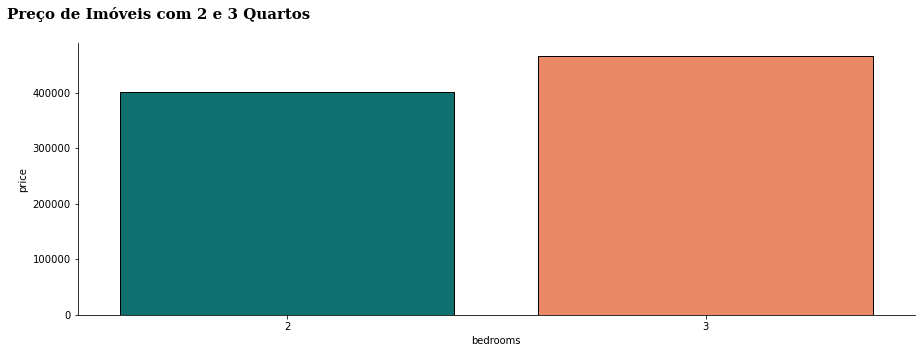

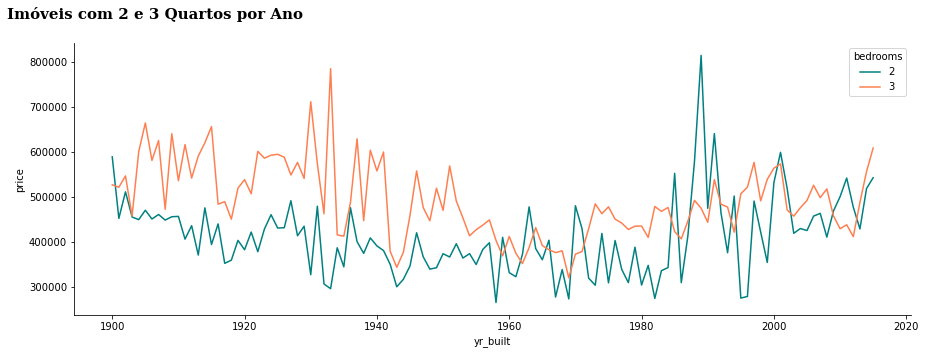

In [15]:
# Figure 1
aux1 = df['price'].groupby(df['bedrooms']).mean()[2:4].reset_index() # Filter
plt.figure(figsize=(15, 5))
sns.barplot(x='bedrooms', y='price', data=aux1, palette=['teal', 'coral'], ec='k')
sns.despine(right=True) # drop line
plt.suptitle('Preço de Imóveis com 2 e 3 Quartos', x=0.2, y=0.98, size=15,
             fontweight='bold', color='black', fontname='serif') # title

# Figure 2
aux2 = df[(df['bedrooms'] == 2) | (df['bedrooms'] == 3)]
aux3 = aux2[['yr_built', 'bedrooms', 'price']].groupby(['yr_built', 'bedrooms']).mean().reset_index()
aux3.pivot(index='yr_built', columns='bedrooms', values='price').plot(figsize=(15, 5), color=['teal', 'coral'])
sns.despine(right=True)
plt.suptitle('Imóveis com 2 e 3 Quartos por Ano', x=0.2, y=0.98, size=15, fontweight='bold', color='black', fontname='serif')
plt.ylabel('price');

### H2. Imóveis sem porão são maiores do que com porão, na média.

**VERDADEIRA** Imóveis sem porão são maiores do que com porão, na média.

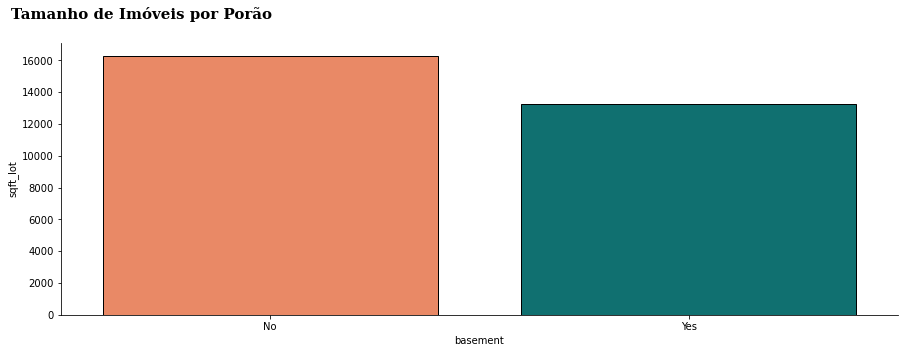

In [16]:
aux1 = df['sqft_lot'].groupby(df['basement']).mean().reset_index() # Filter

# Figure
plt.figure(figsize=(15, 5))
sns.barplot(x='basement', y='sqft_lot', data=aux1, palette=['coral', 'teal'], ec='k')
sns.despine(right=True)
plt.suptitle('Tamanho de Imóveis por Porão', x=0.2, y=0.98, size=15, fontweight='bold', color='black', fontname='serif');

### H3. Imóveis com porão são mais caros, na média.

**VERDADEIRA** Imóveis com porão são mais caros, na média.

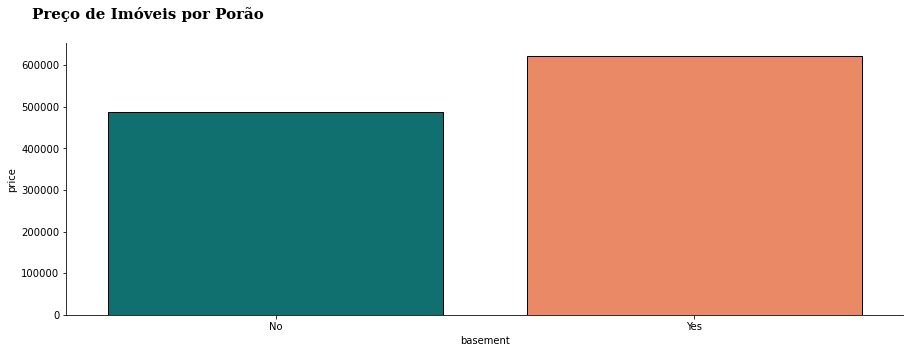

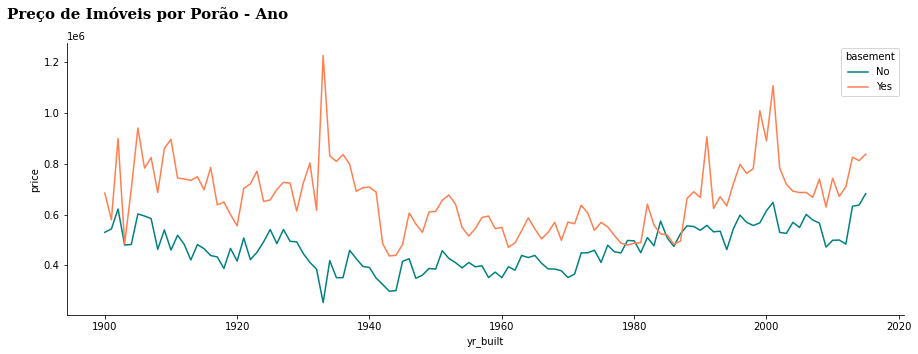

In [17]:
# Figure 1
aux1 = df['price'].groupby(df['basement']).mean().reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(x='basement', y='price', data=aux1, palette=['teal', 'coral'], ec='k')
sns.despine(right=True)
plt.suptitle('Preço de Imóveis por Porão', x=0.2, y=0.98, size=15, fontweight='bold', color='black', fontname='serif')

# Figure 2
aux2 = df[['yr_built', 'basement', 'price']].groupby(['yr_built', 'basement']).mean().reset_index()
aux2.pivot(index='yr_built', columns='basement', values='price').plot(figsize=(15, 5), color=['teal', 'coral'])
sns.despine(right=True)
plt.suptitle('Preço de Imóveis por Porão - Ano', x=0.2, y=0.98, size=15, fontweight='bold', color='black', fontname='serif')
plt.ylabel('price');

### H4. Imóveis são mais caros ao longo do tempo, na média.

**VERDADEIRA** Imóveis são mais caros ao longo do tempo, na média.

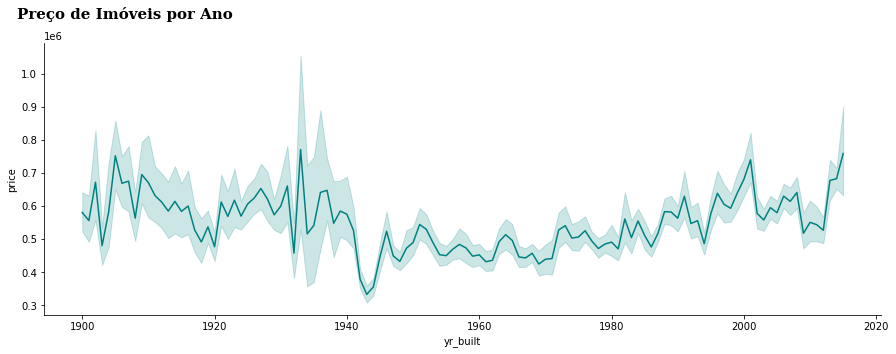

In [18]:
# Figure
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='yr_built', y='price', color='teal')
sns.despine(right=True)
plt.suptitle('Preço de Imóveis por Ano',
             x=0.2, y=0.98, size=15, fontweight='bold',
             color='black', fontname='serif');

### H5. A maior parte dos imóveis de alto padrão possuem reformas.

**FALSA** A maior parte dos imóveis de alto padrão Não possuem reformas.

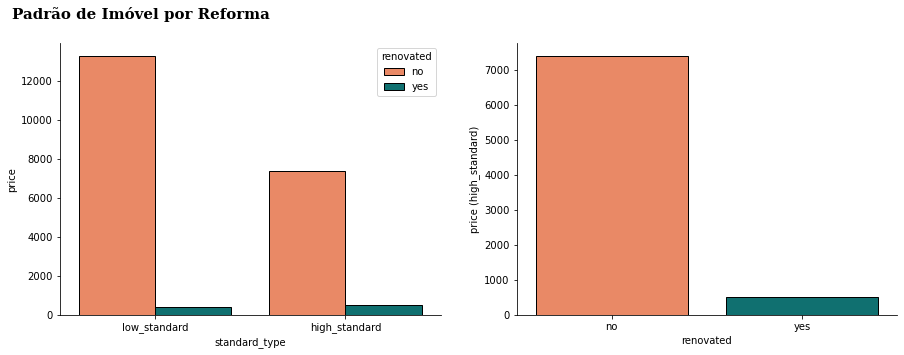

In [19]:
# Figure 1
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='standard_type', data=df, hue='renovated', palette=['coral', 'teal'], ec='k')
sns.despine(right=True)
plt.suptitle('Padrão de Imóvel por Reforma', x=0.2, y=0.98, size=15, fontweight='bold', color='black', fontname='serif')
plt.ylabel('price')

# Figure 2
plt.subplot(1, 2, 2)
aux1 = df[df['standard_type'] == 'high_standard']
sns.countplot(x='renovated', data=aux1, palette=['coral', 'teal'], ec='k')
sns.despine(right=True)
plt.ylabel('price (high_standard)');

### H6. Imóveis com condição igual a 1 são mais baratos, na média.

**FALSA** Imóveis com condição igual a 2 são mais baratos, na média.

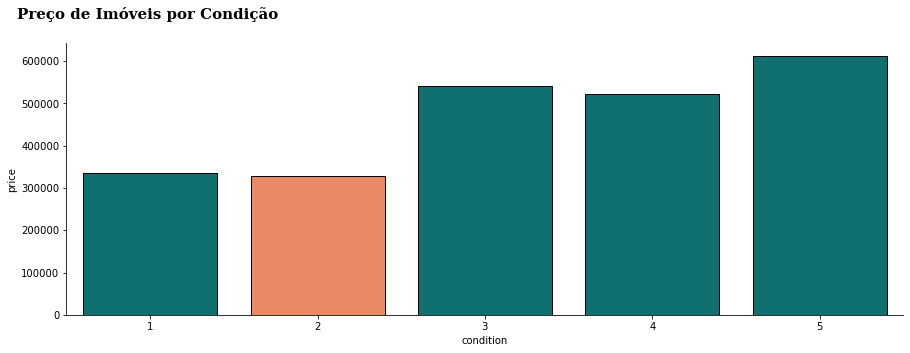

In [20]:
 # Filter
aux1 = df['price'].groupby(df['condition']).mean().reset_index()

# Figure
plt.figure(figsize=(15, 5))
sns.barplot(x='condition', y='price', data=aux1, palette=['teal', 'coral', 'teal',
                                                          'teal', 'teal'], ec='k')
sns.despine(right=True)
plt.suptitle('Preço de Imóveis por Condição', x=0.2, y=0.98, size=15,
             fontweight='bold', color='black', fontname='serif');

### H7. Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

**FALSA** Imóveis com data de construção menor que 1955, são 2% mais baratos, na média.

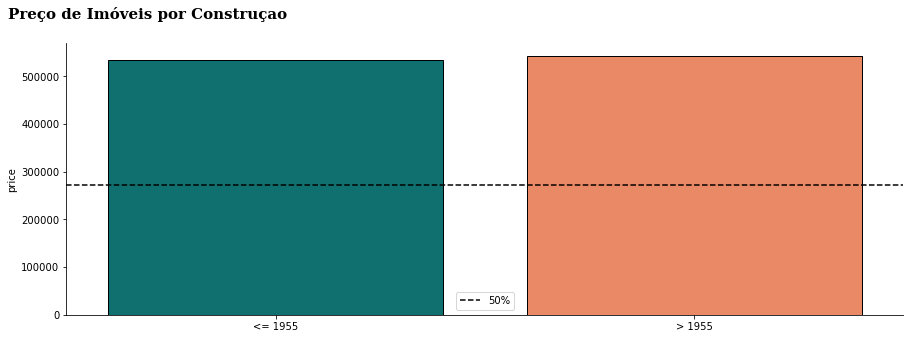

In [21]:
aux1 = df[df['yr_built'] <= 1955]['price'].mean() # Filter 1
aux2 = df[df['yr_built'] > 1955]['price'].mean()  # Filter 2
kpi = aux2 * 50 / 100 # Metric

# Figure
plt.figure(figsize=(15, 5))
sns.barplot(x=['<= 1955', '> 1955'], y=[aux1, aux2], palette=['teal', 'coral'], ec='k')
plt.axhline(kpi, 0, 1, color='black', **{'ls': '--'}, label='50%')
plt.legend()
sns.despine(right=True)
plt.suptitle('Preço de Imóveis por Construçao', x=0.2, y=0.98, size=15, fontweight='bold', color='black', fontname='serif')
plt.ylabel('price');

### H8. Imóveis com notas iguais a 1 são mais baratos, na média.

**VERDADEIRA** Imóveis com notas iguais a 1 são mais baratos, na média.

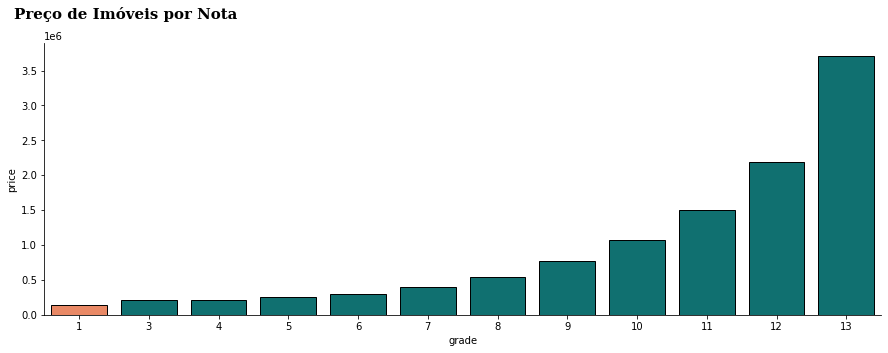

In [22]:
# Custom color
color = []
for v in list(df['grade'].value_counts().sort_index().index):
    if v == 1:
        color.append('coral')
    else:
        color.append('teal')

# Figure        
aux1 = df['price'].groupby(df['grade']).mean().reset_index() # Group
plt.figure(figsize=(15, 5))
sns.barplot(x='grade', y='price', data=aux1, palette=color, ec='k')
sns.despine(right=True)
plt.suptitle('Preço de Imóveis por Nota', x=0.2, y=0.98, size=15, fontweight='bold', color='black', fontname='serif');

### H9. Em média, imóveis sem reforma são mais baratos.

**VERDADEIRA** Imóveis que não receberam reforma são mais baratos, na média.

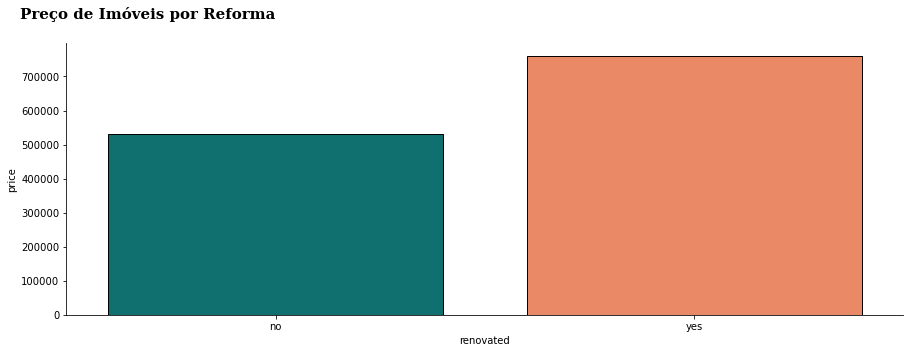

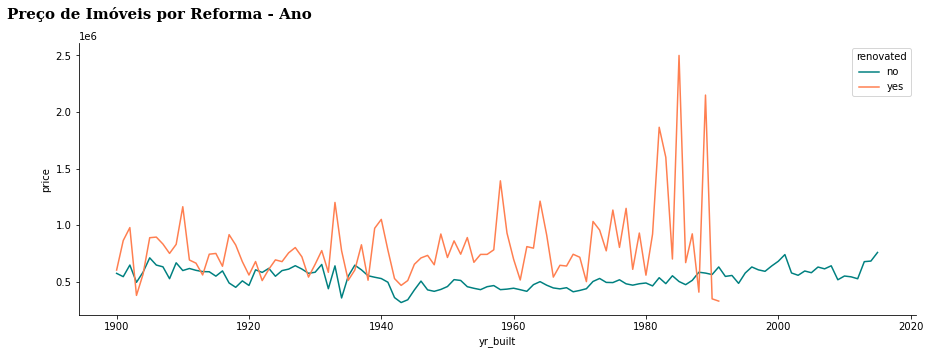

In [23]:
# Group
aux1 = df['price'].groupby(df['renovated']).mean().reset_index()

# Figure 1
plt.figure(figsize=(15, 5))
sns.barplot(x='renovated', y='price', data=aux1, palette=['teal', 'coral'], ec='k')
sns.despine(right=True)
plt.suptitle('Preço de Imóveis por Reforma', x=0.2, y=0.98, size=15, fontweight='bold', color='black', fontname='serif')

# Figure 2
aux2 = df[['yr_built', 'renovated', 'price']].groupby(['yr_built', 'renovated']).mean().reset_index()
aux2.pivot(index='yr_built', columns='renovated', values='price').plot(figsize=(15, 5), color=['teal', 'coral'])
sns.despine(right=True)
plt.suptitle('Preço de Imóveis por Reforma - Ano', x=0.2, y=0.98, size=15, fontweight='bold', color='black', fontname='serif')
plt.ylabel('price');

### H10. Imóveis que possuem vista para água são mais caros, na média.

**VERDADEIRA** Imóveis que possuem vista para água são mais caros, na média

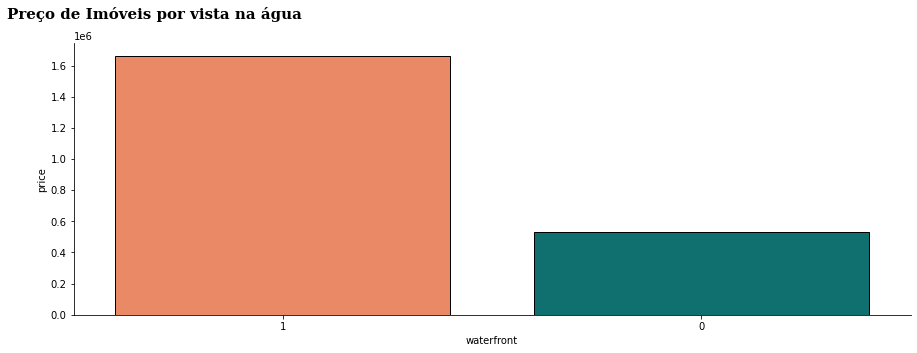

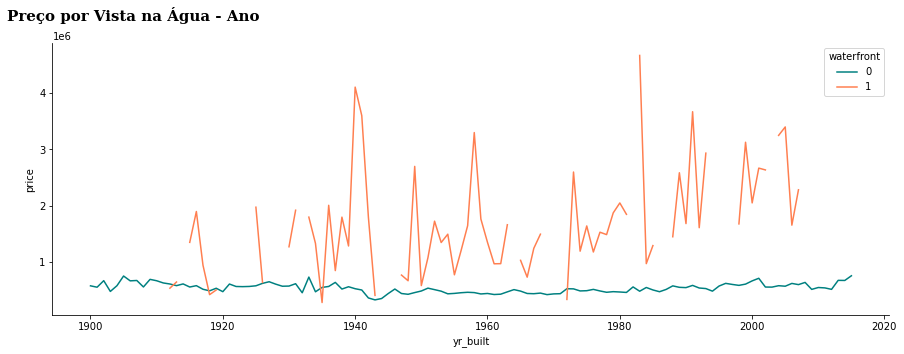

In [24]:
# Group
axu1 = df['price'].groupby(df['waterfront']).mean().reset_index().sort_values(by='price', ascending=False)

# Figure 1
plt.figure(figsize=(15, 5))
sns.barplot(x='waterfront', y='price', data=axu1, palette=['coral', 'teal'], ec='k')
sns.despine(right=True)
plt.suptitle('Preço de Imóveis por vista na água', x=0.2, y=0.98, size=15, fontweight='bold', color='black', fontname='serif')

# Figure 2
aux2 = df[['price', 'yr_built', 'waterfront']].groupby(['yr_built', 'waterfront']).mean().reset_index()
aux2.pivot(index='yr_built', columns='waterfront', values='price').plot(figsize=(15, 5), color=['teal', 'coral'])
plt.ylabel('price')
sns.despine(right=True)
plt.suptitle('Preço por Vista na Água - Ano', x=0.2, y=0.98, size=15, fontweight='bold', color='black', fontname='serif');

### H11. Imóveis disponíveis para venda no verão são mais baratos, na média.

**FALSA** Imóveis disponíveis para venda no Inverno são mais baratos e na primavera são mais caros, na média.

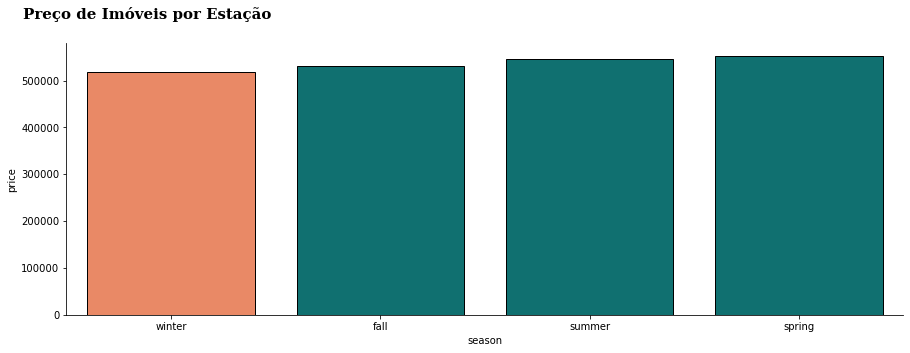

In [25]:
# Group
aux1 = df['price'].groupby(df['season']).mean().sort_values().reset_index()

# Figure
plt.figure(figsize=(15, 5))
sns.barplot(x='season', y='price', data=aux1, palette=['coral', 'teal', 'teal', 'teal'], ec='k')
sns.despine(right=True)
plt.suptitle('Preço de Imóveis por Estação', x=0.2, y=0.98, size=15, fontweight='bold', color='black', fontname='serif');

### H12. Imóveis que são considerados casas são mais caros do que apartamentos, na média.

**VERDADEIRA** Casas são mais caras do que apartamentos, na média.

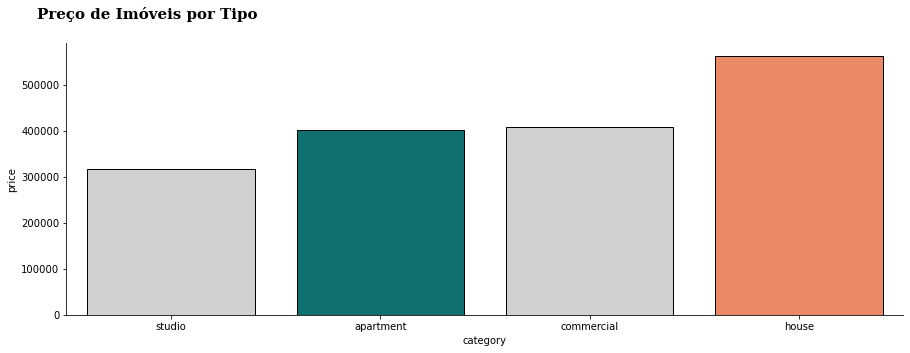

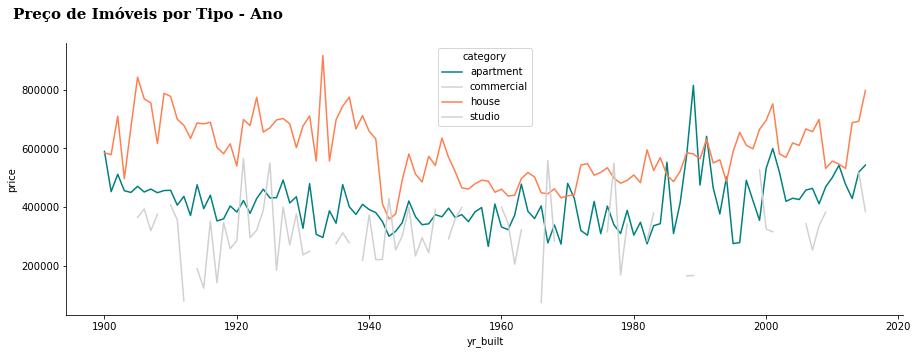

In [26]:
# Group
aux1 = df['price'].groupby(df['category']).mean().sort_values().reset_index()

# Figure 1
plt.figure(figsize=(15, 5))
sns.barplot(x='category', y='price', data=aux1, palette=['#d1d1d1', 'teal', '#d1d1d1', 'coral'], ec='k')
sns.despine(right=True)
plt.suptitle('Preço de Imóveis por Tipo', x=0.2, y=0.98, size=15, fontweight='bold', color='black', fontname='serif')

# Figure 2
aux2 = df[['yr_built', 'category', 'price']].groupby(['yr_built', 'category']).mean().reset_index()
aux2.pivot(
    index='yr_built', columns='category', values='price').plot(
    figsize=(15, 5),color=['teal', '#d1d1d1', 'coral', '#d1d1d1'])

sns.despine(right=True)
plt.suptitle('Preço de Imóveis por Tipo - Ano', x=0.2, y=0.98, size=15,
             fontweight='bold', color='black', fontname='serif')

plt.ylabel('price');

## 3.3 Análise Multivariada

### 3.3.1 Variável Numérica

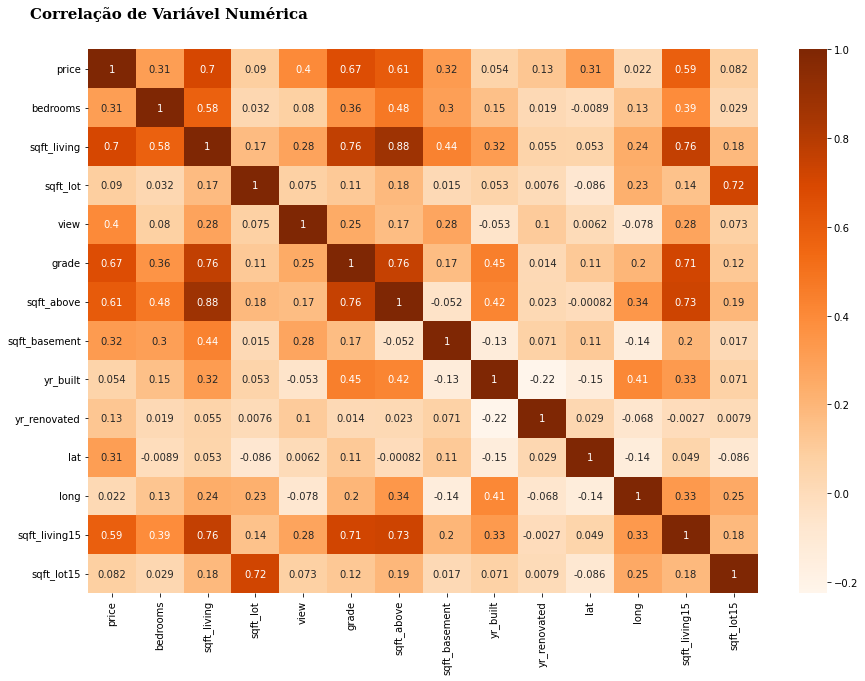

In [27]:
# Figure
plt.figure(figsize=(15, 10))
sns.heatmap(numerical.corr(method='pearson'), annot=True, cmap='Oranges')
plt.suptitle('Correlação de Variável Numérica', x=0.2, y=0.94, size=15,
             fontweight='bold', color='black', fontname='serif');

**Insight:** Nas variaveis numéricas, há uma boa correlação do preço dos imóveis em relação a nota e as medidas de tamanho dos imóveis, para os demais atributos a correlação é fraca.

### 3.3.2 Variável Categórica

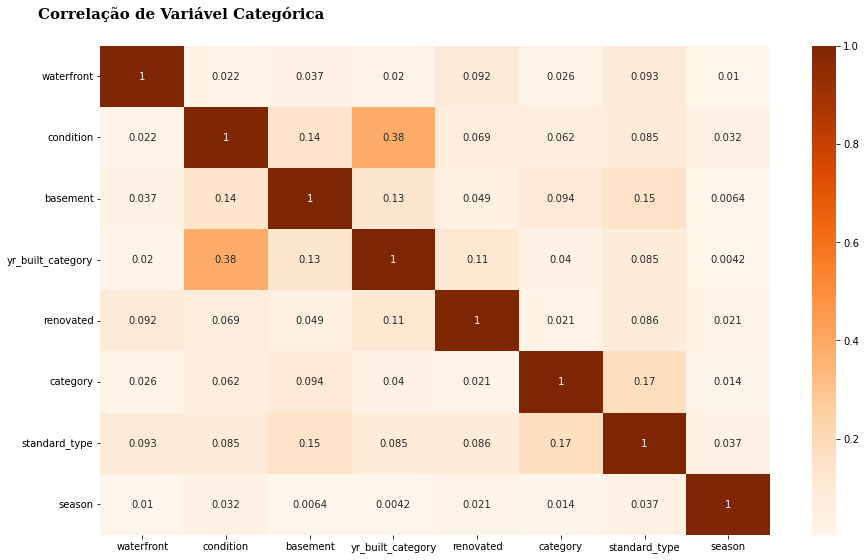

In [28]:
# Categorical data
categories = df.select_dtypes(include='object').drop(columns=['id'])

# Apply correlation 
matrix = show_matrix(data=categories, col='waterfront', output='dict')
data_columns = categories.iloc[:, 1:]

for c in data_columns.columns:
    matrix[c] = show_matrix(data=categories, col=c, output='list')

# Figure
plt.figure(figsize=(15, 9))
sns.heatmap(matrix, annot=True, cmap='Oranges')
plt.suptitle('Correlação de Variável Categórica', x=0.2, y=0.94, size=15,
             fontweight='bold', color='black', fontname='serif');

**Insight:** Nas variaveis categóricas, há uma certa correlação da condição do imóvel com o ano em que ele foi construido e o porão possuindo alguma correlação com o padrão da casa (alto ou baixo). Nos demais atributos, há pouca correlação a ser observada.

# 4.0 RESPONDENDO PERGUNTAS DE NEGÓCIO

### 1.Quais são os imóveis que a House Rocket deveria comprar e por qual preço?

- Eu vou agrupar os dados por região (Zipcode).
- Dentro de cada região, encontrar a mediana do preço dos imóveis.
- Vou seugerir que os imóveis que estão abaixo do preço mediano de cada região e que estejam em boas condições, sejam comprados.

### 2. Uma vez o imóvel comprado, qual o melhor momento para vendê-lo e por qual preço?

- Eu vou agrupar os imóveis por região (Zipcode) e por sazonalidade (Estação do ano).
- Dentro de cada região e sazonalidade, será calculado a mediana de preço.
- Condições de venda:
    - **1.** Se o preço da compra for Maior que a mediana da região + sazonalidade.
        - O preço da venda será igual ao preço da compra + 10%.
    - **2.** Se o preço da compra for Menor que a mediana da região + sazonalidade.
        - O preço da venda será igual ao preço da compra + 30%.

# 5.0 ENTREGA DA SOLUÇÃO

In [29]:
# -- 1º question

# Group data by region and find the median price
price_median = df['price'].groupby(df['zipcode']).median().reset_index().rename(
    columns={
        'price': 'price_median'
})

# Map median price of all regions
df2 = pd.merge(df, price_median, on='zipcode', how='inner')

# Insert status
df2['status'] = df2[['price', 'price_median', 'condition']].apply(
    lambda x: 'compra' if x['price'] < x['price_median'] and x['condition'] not in ['1', '2'] else 'não compra', axis=1
)


# -- 2º question

# Filter house with recommendation = compra
compra = df2[df2['status'] == 'compra']

# Group data by region, season and find the median price 
aux1 = compra[['price', 'zipcode', 'season']].groupby(['zipcode', 'season']).median().reset_index().rename(columns=({'price': 'price_median_season'}))

# Map median price of all regions
aux2 = pd.merge(compra, aux1, on=['zipcode', 'season'], how='inner')

# Insert the percentage of sale
aux2['venda'] = aux2[['price', 'price_median_season', 'season']].apply(
    lambda x: '+ 10%'  if x['price'] > x['price_median_season'] else '+ 30%', axis=1
)

# calculate the value of the sale
aux2['price_sale'] = aux2[['price', 'venda']].apply(
    lambda x: x['price'] + (x['price'] * 10) / 100 if x['venda'] == '+ 10%' else x['price'] + (x['price'] * 30) / 100, axis=1
)

# Calculate profit and margin
aux2['lucro'] = aux2[['price_sale', 'price']].apply(lambda x: x['price_sale'] - x['price'], axis=1)
aux2['margem_lucro'] = aux2[['price_sale', 'price']].apply(lambda x: (x['price_sale'] - x['price']) / x['price_sale'] * 100, axis=1).round().astype('str')
aux2['margem_lucro'] = aux2['margem_lucro'].apply(lambda x: x + '%') # Include percentage symbol

# Filter Columns to report final
report = aux2[['id', 'zipcode', 'season', 'status', 'venda', 'price', 'price_sale', 'lucro', 'margem_lucro']]

# Parse report to excel
report.to_excel('report_house_rocket.xlsx', index=False)

report.head()

,id,zipcode,season,status,venda,price,price_sale,lucro,margem_lucro
0,7129300520,98178,fall,compra,+ 10%,221900.0,244090.0,22190.0,9.0%
1,2976800796,98178,fall,compra,+ 10%,236000.0,259600.0,23600.0,9.0%
2,1180003090,98178,fall,compra,+ 30%,190000.0,247000.0,57000.0,23.0%
3,179000350,98178,fall,compra,+ 30%,194000.0,252200.0,58200.0,23.0%
4,3810000202,98178,fall,compra,+ 10%,251700.0,276870.0,25170.0,9.0%


# 6.0 RETORNO AO NEGÓCIO

Seguindo as recomendações de compra e venda dos imóveis, a House Rocket irá gastar no total 4.094.212.008,00 de dolares para comprar todos os imóveis recomendados e irá conseguir um lucro bruto total de 4.868.167.042,20 em dolares e um lucro liquido total de U$773.955.034,19 com uma margem de lucro total de 16%.